In [23]:
!pip3 install Pycryptodomex
from Cryptodome.Cipher import AES, DES, DES3, Blowfish
from Cryptodome.Random import get_random_bytes
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from base64 import b64encode

In [24]:
data = get_random_bytes(1024000000)
#print(data)
data1 = get_random_bytes(1) #Placeholder
print(data1)
keyAES = get_random_bytes(32)
print(keyAES)
keyDES = get_random_bytes(8)
print(keyDES)
keyBF = get_random_bytes(56)
print(keyBF)

b'\xcc'
b'\x06\xed\xed\xaa+\x81\x066\xa67*\xf0\xd3\xd6=0\x98\x06K%\x12K\x98\x7f\xae\tf\x92_ \xe9\xe7'
b'$^N\x88\xb3G7\x1d'
b'\xfd\xdc;/\xa4\xcc\x98\xbe\xe6\xab\xff\xa2\xa9\xbd\xfa"\x10-2m\x8d\x81\x02\xbe:\xa7\x08_Ek\xbe@\xbc\xf3J\xc5\xb6\xa7\x8b\xe5.\xcf\x94\x02B\xc7\x80\x021{\xdd\x9d\x9f\xb4|\x17'


In [25]:
algorithms = ['AES', 'DES', '3DES', 'Blowfish']
encTimes = []
decTimes = []

while True:
    try:
        keyDES3 = DES3.adjust_key_parity(get_random_bytes(24))
        break
    except ValueError:
        pass

In [26]:
def des_encrypt():
    cipher = DES.new(keyDES, DES.MODE_CFB)
    ciphertext= cipher.encrypt(data)
    
    return cipher.iv, ciphertext

In [27]:
def des_decrypt(iv, ciphertext):
    global data1
    cipher = DES.new(keyDES, DES.MODE_CFB, iv=iv)
    data1 = cipher.decrypt(ciphertext)

In [28]:
def aes_encrypt():
    cipher = AES.new(keyAES, AES.MODE_CFB)
    ciphertext= cipher.encrypt(data)
    ciphertext
    
    return cipher.iv, ciphertext
  
def aes_decrypt(iv, ciphertext):
    global data1
    cipher = AES.new(keyAES, AES.MODE_CFB, iv=iv)
    data1 = cipher.decrypt(ciphertext)

In [29]:
def des3_encrypt():
    cipher = DES3.new(keyDES3, DES3.MODE_CFB)
    ciphertext= cipher.encrypt(data)
    
    return cipher.iv, ciphertext

In [30]:
def des3_decrypt(iv, ciphertext):
    global data1
    cipher = DES3.new(keyDES3, DES3.MODE_CFB, iv=iv)
    data1 = cipher.decrypt(ciphertext)

In [31]:
def blowfish_encrypt():
    cipher = Blowfish.new(keyBF, Blowfish.MODE_CFB)
    ciphertext= cipher.encrypt(data)
    
    return cipher.iv, ciphertext

In [32]:
def blowfish_decrypt(iv, ciphertext):
    global data1
    cipher = Blowfish.new(keyBF, Blowfish.MODE_CFB, iv=iv)
    data1 = cipher.decrypt(ciphertext)

In [33]:
#AES
start = timer()
iv, ciphertext = aes_encrypt()
end = timer()
print("AES Encryption: ", end - start)
encTimes.append(end - start)

start = timer()
aes_decrypt(iv, ciphertext)
end = timer()
print("AES Decryption: ", end - start)
decTimes.append(end - start)

if data == data1:
    print("Success")
else:
    print("Failure")

AES Encryption:  4.78406628599987
AES Decryption:  4.728494661000013
Success


In [34]:
#DES
start = timer()
iv, ciphertext = des_encrypt()
end = timer()
print("DES Encryption: ", end - start)
encTimes.append(end - start)

start = timer()
des_decrypt(iv, ciphertext)
end = timer()
print("DES Decryption: ", end - start)
decTimes.append(end - start)

if data == data1:
    print("Success")
else:
    print("Failure")

DES Encryption:  13.842636992999815
DES Decryption:  13.494048198999963
Success


In [35]:
#3DES
start = timer()
iv, ciphertext = des3_encrypt()
end = timer()
print("3DES Encryption: ", end - start)
encTimes.append(end - start)

start = timer()
des3_decrypt(iv, ciphertext)
end = timer()
print("3DES Decryption: ", end - start)
decTimes.append(end - start)

if data == data1:
    print("Success")
else:
    print("Failure")

3DES Encryption:  37.469981695000115
3DES Decryption:  37.19436661100008
Success


In [36]:
#Blowfish
start = timer()
iv, ciphertext = blowfish_encrypt()
end = timer()
print("Blowfish Encryption: ", end - start)
encTimes.append(end - start)

start = timer()
blowfish_decrypt(iv, ciphertext)
end = timer()
print("Blowfish Decryption: ", end - start)
decTimes.append(end - start)

if data == data1:
    print("Success")
else:
    print("Failure")

Blowfish Encryption:  8.586815845000046
Blowfish Decryption:  8.206577631000073
Success


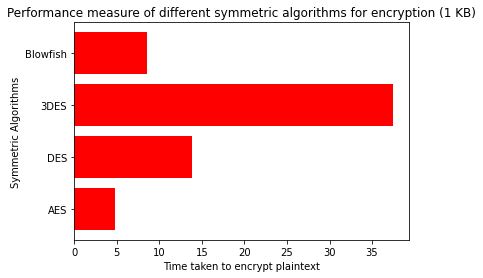

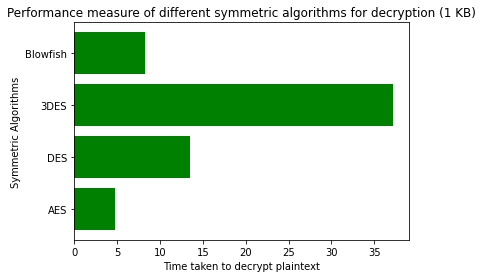

In [37]:
# Encryption Plot
plt.barh(algorithms, encTimes, color = 'red')

plt.ylabel("Symmetric Algorithms")
plt.xlabel("Time taken to encrypt plaintext")
plt.title("Performance measure of different symmetric algorithms for encryption (1 KB)")
plt.show()

# Decryption Plot
plt.barh(algorithms, decTimes, color = 'green')

plt.ylabel("Symmetric Algorithms")
plt.xlabel("Time taken to decrypt plaintext")
plt.title("Performance measure of different symmetric algorithms for decryption (1 KB)")
plt.show()